In [1]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN, A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

pygame 2.0.1 (SDL 2.0.14, Python 3.7.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

In [3]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 86.2     |
|    ep_rew_mean        | -35.3    |
| time/                 |          |
|    fps                | 324      |
|    iterations         | 1000     |
|    time_elapsed       | 15       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.503   |
|    explained_variance | 0.0313   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.247   |
|    value_loss         | 0.785    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 78.7     |
|    ep_rew_mean        | -6.7     |
| time/                 |          |
|    fps                | 328      |
|    iterations         | 2000     |
|    time_elapsed       | 30       |
|    total_timesteps    | 10000    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 74        |
|    ep_rew_mean        | -12.9     |
| time/                 |           |
|    fps                | 344       |
|    iterations         | 2000      |
|    time_elapsed       | 29        |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -0.000987 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 1999      |
|    policy_loss        | -0.000128 |
|    value_loss         | 2.31      |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 96.7     |
|    ep_rew_mean        | 14.7     |
| time/                 |          |
|    fps                | 346      |
|    iterations         | 3000     |
|    time_elapsed       | 43       |
|    total_timesteps    | 15000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 99.3     |
|    ep_rew_mean        | 25.7     |
| time/                 |          |
|    fps                | 35       |
|    iterations         | 3000     |
|    time_elapsed       | 424      |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.0743  |
|    explained_variance | 0.206    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.00858  |
|    value_loss         | 13.3     |
------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 130       |
|    ep_rew_mean        | 53.8      |
| time/                 |           |
|    fps                | 40        |
|    iterations         | 4000      |
|    time_elapsed       | 495       |
|    total_timesteps    | 20000     |
| train/                |    

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 128       |
|    ep_rew_mean        | 52.3      |
| time/                 |           |
|    fps                | 303       |
|    iterations         | 4000      |
|    time_elapsed       | 65        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.000349 |
|    explained_variance | nan       |
|    learning_rate      | 0.001     |
|    n_updates          | 3999      |
|    policy_loss        | 0.000243  |
|    value_loss         | 69.9      |
-------------------------------------


Gamma 0.9819713399228942


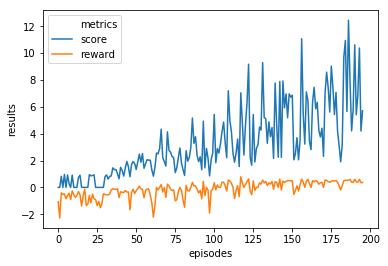

Max Train Score 24 Max Test Score 24
Mean Train Score 3.2674973017318076 Mean Test Score 6.759667856199609
----------------------------------------------------------------------------------------------------
Gamma 0.9886664476628992


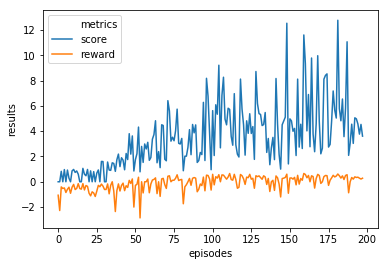

Max Train Score 23 Max Test Score 25
Mean Train Score 3.5013124258362094 Mean Test Score 5.4386903285254755
----------------------------------------------------------------------------------------------------
Gamma 0.9982109137366371


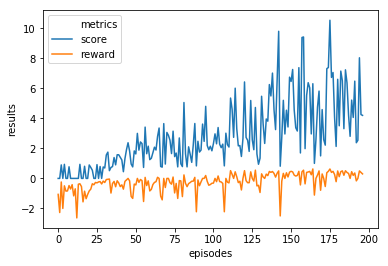

Max Train Score 20 Max Test Score 23
Mean Train Score 2.8106800033546597 Mean Test Score 6.194453671925368
----------------------------------------------------------------------------------------------------
Gamma 0.958626375650517


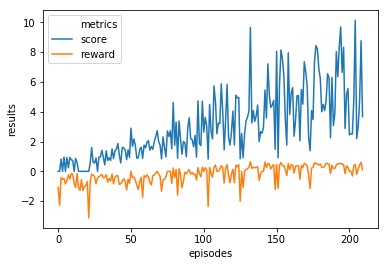

Max Train Score 19 Max Test Score 38
Mean Train Score 3.005255539339772 Mean Test Score 6.884257108917686
----------------------------------------------------------------------------------------------------
Gamma 0.9940494497490135


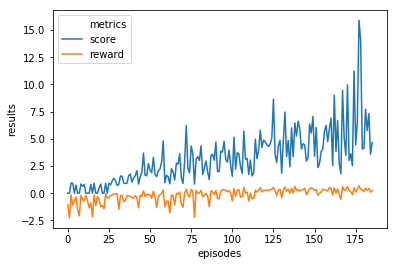

Max Train Score 31 Max Test Score 26
Mean Train Score 3.200892177439122 Mean Test Score 5.7821736661679015
----------------------------------------------------------------------------------------------------
Gamma 0.9880736793739928


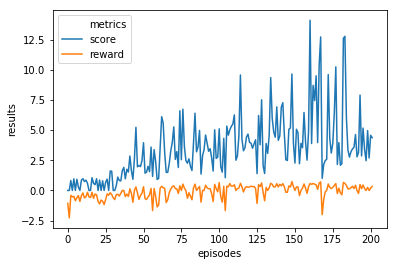

Max Train Score 25 Max Test Score 35
Mean Train Score 3.4458794847301775 Mean Test Score 5.247565718981171
----------------------------------------------------------------------------------------------------
Gamma 0.9717491439217493


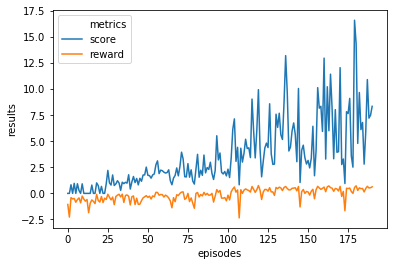

Max Train Score 30 Max Test Score 34
Mean Train Score 3.5501275297233508 Mean Test Score 7.650395922993988
----------------------------------------------------------------------------------------------------
Gamma 0.9791161900707032


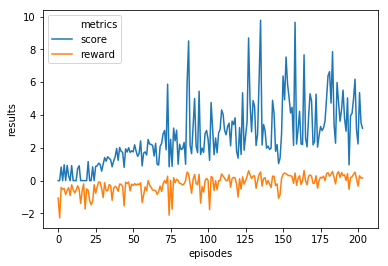

Max Train Score 18 Max Test Score 22
Mean Train Score 2.7001291720460716 Mean Test Score 4.830829437272141
----------------------------------------------------------------------------------------------------
Gamma 0.9695567084338751


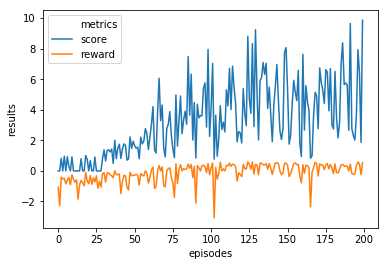

Max Train Score 18 Max Test Score 21
Mean Train Score 3.239711483258993 Mean Test Score 5.255460700143976
----------------------------------------------------------------------------------------------------
Gamma 0.9931318273728653


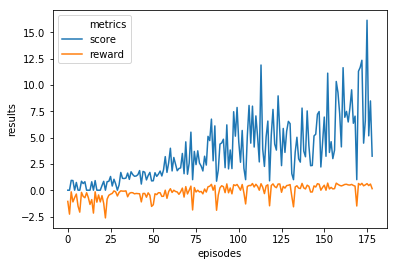

Max Train Score 33 Max Test Score 34
Mean Train Score 3.595221225566695 Mean Test Score 7.442343328402446
----------------------------------------------------------------------------------------------------


In [5]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando: normalize_advantage

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.8     |
|    ep_rew_mean        | -45.8    |
| time/                 |          |
|    fps                | 309      |
|    iterations         | 1000     |
|    time_elapsed       | 16       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.911   |
|    explained_variance | -0.241   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.184   |
|    value_loss         | 0.000129 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 104      |
|    ep_rew_mean        | -45.2    |
| time/                 |          |
|    fps                | 321      |
|    iterations         | 2000     |
|    time_elapsed       | 31       |
|    total_timesteps    | 10000    |
| train/             

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 156       |
|    ep_rew_mean        | -35.8     |
| time/                 |           |
|    fps                | 41        |
|    iterations         | 2000      |
|    time_elapsed       | 241       |
|    total_timesteps    | 10000     |
| train/                |           |
|    entropy_loss       | -0.732    |
|    explained_variance | -9.94e+03 |
|    learning_rate      | 0.001     |
|    n_updates          | 1999      |
|    policy_loss        | -0.176    |
|    value_loss         | 1.47e+03  |
-------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 151      |
|    ep_rew_mean        | -31.8    |
| time/                 |          |
|    fps                | 58       |
|    iterations         | 3000     |
|    time_elapsed       | 256      |
|    total_timesteps    | 15000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 117      |
|    ep_rew_mean        | -31.5    |
| time/                 |          |
|    fps                | 320      |
|    iterations         | 3000     |
|    time_elapsed       | 46       |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.249   |
|    explained_variance | 0.012    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | -0.0277  |
|    value_loss         | 0.00701  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 69.2     |
|    ep_rew_mean        | -29.8    |
| time/                 |          |
|    fps                | 326      |
|    iterations         | 4000     |
|    time_elapsed       | 61       |
|    total_timesteps    | 20000    |
| train/                |          |
|

-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 99.9      |
|    ep_rew_mean        | 5.2       |
| time/                 |           |
|    fps                | 346       |
|    iterations         | 4000      |
|    time_elapsed       | 57        |
|    total_timesteps    | 20000     |
| train/                |           |
|    entropy_loss       | -0.0334   |
|    explained_variance | -8.24e+11 |
|    learning_rate      | 0.001     |
|    n_updates          | 3999      |
|    policy_loss        | -3.07e-09 |
|    value_loss         | 22        |
-------------------------------------
Gamma 0.9975495131071721


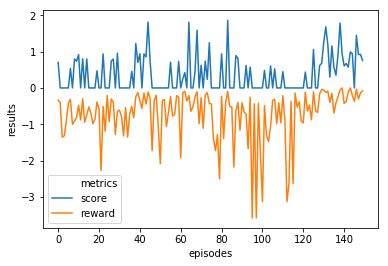

Max Train Score 4 Max Test Score 3
Mean Train Score 0.36070794361690656 Mean Test Score 1.0146911937446572
----------------------------------------------------------------------------------------------------
Gamma 0.9530306337038507


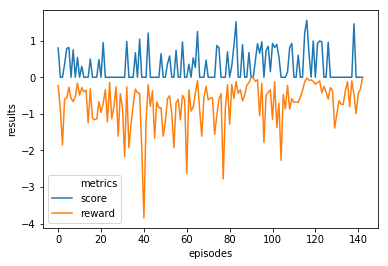

Max Train Score 3 Max Test Score 0
Mean Train Score 0.30146034516461484 Mean Test Score 0.0
----------------------------------------------------------------------------------------------------
Gamma 0.957642065967413


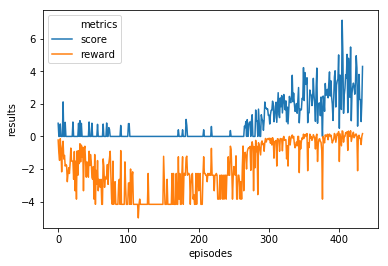

Max Train Score 14 Max Test Score 18
Mean Train Score 0.8570508611780674 Mean Test Score 3.22396735651195
----------------------------------------------------------------------------------------------------
Gamma 0.9867837429739714


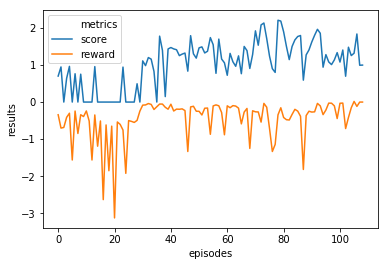

Max Train Score 6 Max Test Score 3
Mean Train Score 1.0241246716325305 Mean Test Score 1.386484092632589
----------------------------------------------------------------------------------------------------
Gamma 0.9932302848109982


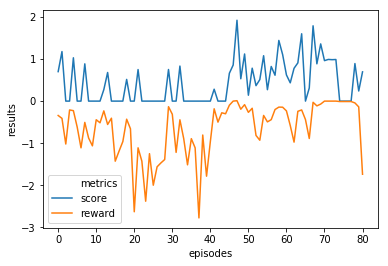

Max Train Score 3 Max Test Score 2
Mean Train Score 0.426845971540571 Mean Test Score 0.43121777358885666
----------------------------------------------------------------------------------------------------
Gamma 0.9579991000861224


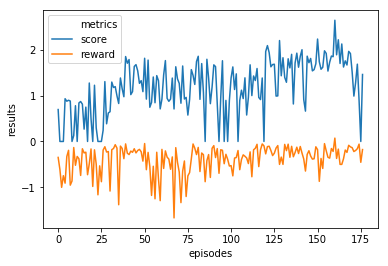

Max Train Score 6 Max Test Score 5
Mean Train Score 1.1959275361718915 Mean Test Score 1.4024445395555893
----------------------------------------------------------------------------------------------------
Gamma 0.9973530371179677


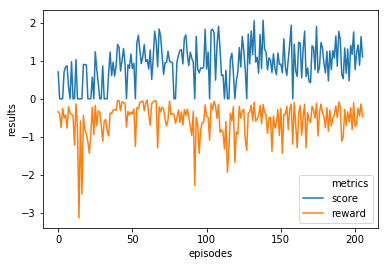

Max Train Score 4 Max Test Score 6
Mean Train Score 0.9159208194354805 Mean Test Score 0.9496554665430286
----------------------------------------------------------------------------------------------------
Gamma 0.9723273696521597


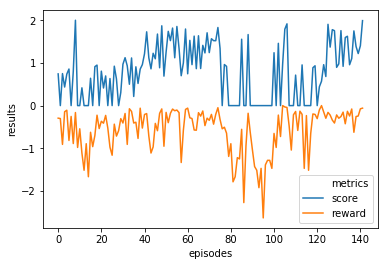

Max Train Score 4 Max Test Score 6
Mean Train Score 0.7949006375005787 Mean Test Score 1.4302173168932675
----------------------------------------------------------------------------------------------------
Gamma 0.9757726004957608


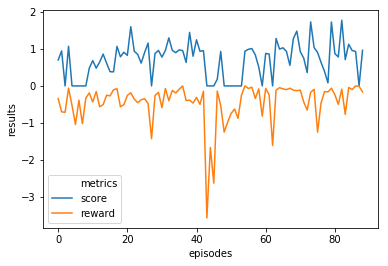

Max Train Score 3 Max Test Score 4
Mean Train Score 0.7079564095632608 Mean Test Score 0.8596400923036476
----------------------------------------------------------------------------------------------------
Gamma 0.974282056272536


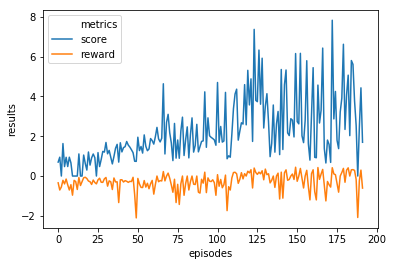

Max Train Score 16 Max Test Score 22
Mean Train Score 2.2358963950034467 Mean Test Score 4.0047974862874804
----------------------------------------------------------------------------------------------------


In [6]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.95, 1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, normalize_advantage=True)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Testando: ent_coef

Using cpu device
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 102      |
|    ep_rew_mean        | -40.2    |
| time/                 |          |
|    fps                | 337      |
|    iterations         | 1000     |
|    time_elapsed       | 14       |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -1.08    |
|    explained_variance | -0.171   |
|    learning_rate      | 0.001    |
|    n_updates          | 999      |
|    policy_loss        | -0.00198 |
|    value_loss         | 0.000166 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 77.7     |
|    ep_rew_mean        | -25.7    |
| time/                 |          |
|    fps                | 342      |
|    iterations         | 2000     |
|    time_elapsed       | 29       |
|    total_timesteps    | 10000    |
| train/             

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 83.1     |
|    ep_rew_mean        | -19.4    |
| time/                 |          |
|    fps                | 50       |
|    iterations         | 2000     |
|    time_elapsed       | 199      |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.646   |
|    explained_variance | 0.00716  |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | -0.0251  |
|    value_loss         | 0.304    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 95.2     |
|    ep_rew_mean        | 16.6     |
| time/                 |          |
|    fps                | 41       |
|    iterations         | 3000     |
|    time_elapsed       | 357      |
|    total_timesteps    | 15000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 73.7     |
|    ep_rew_mean        | -11.4    |
| time/                 |          |
|    fps                | 37       |
|    iterations         | 3000     |
|    time_elapsed       | 400      |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -0.427   |
|    explained_variance | 0.404    |
|    learning_rate      | 0.001    |
|    n_updates          | 2999     |
|    policy_loss        | 0.241    |
|    value_loss         | 7.83     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 85.8     |
|    ep_rew_mean        | 2.2      |
| time/                 |          |
|    fps                | 48       |
|    iterations         | 4000     |
|    time_elapsed       | 415      |
|    total_timesteps    | 20000    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 102      |
|    ep_rew_mean        | 28.2     |
| time/                 |          |
|    fps                | 103      |
|    iterations         | 4000     |
|    time_elapsed       | 192      |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.188   |
|    explained_variance | 0.506    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.11     |
|    value_loss         | 12.7     |
------------------------------------
entropy 0.07173580562502437


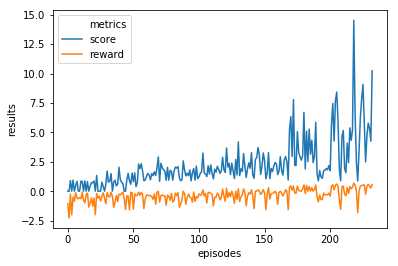

Max Train Score 27 Max Test Score 23
Mean Train Score 2.2072416708098643 Mean Test Score 5.428549607554753
----------------------------------------------------------------------------------------------------
entropy 0.09836082059519828


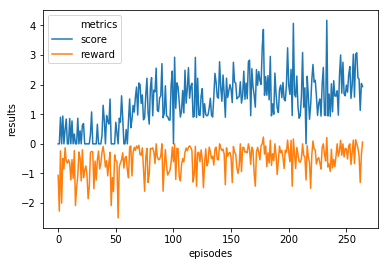

Max Train Score 8 Max Test Score 10
Mean Train Score 1.4103038419027307 Mean Test Score 2.116828845323415
----------------------------------------------------------------------------------------------------
entropy 0.0692068491112615


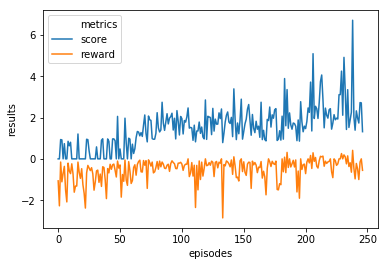

Max Train Score 12 Max Test Score 17
Mean Train Score 1.5072989149106664 Mean Test Score 2.786995641120289
----------------------------------------------------------------------------------------------------
entropy 0.028860169703909568


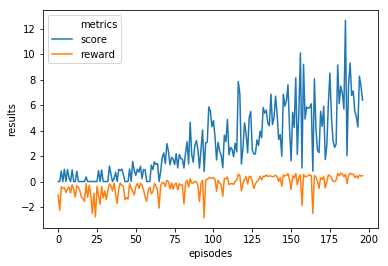

Max Train Score 25 Max Test Score 31
Mean Train Score 2.889519751014146 Mean Test Score 5.853348143222715
----------------------------------------------------------------------------------------------------
entropy 0.09038002688356579


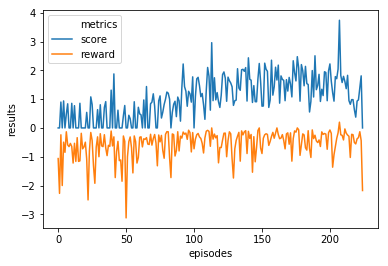

Max Train Score 7 Max Test Score 4
Mean Train Score 1.0462887925148134 Mean Test Score 1.11941984715393
----------------------------------------------------------------------------------------------------
entropy 0.031817632723379986


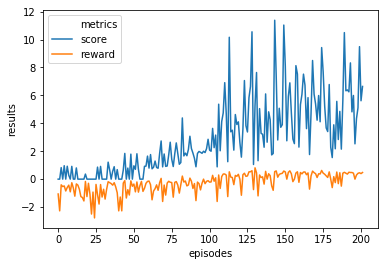

Max Train Score 23 Max Test Score 25
Mean Train Score 2.899781050994092 Mean Test Score 6.3863543728094765
----------------------------------------------------------------------------------------------------
entropy 0.06972889777885581


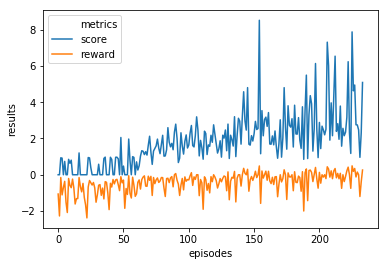

Max Train Score 16 Max Test Score 18
Mean Train Score 1.8524270389214499 Mean Test Score 3.5248152473568104
----------------------------------------------------------------------------------------------------
entropy 0.08164532259331306


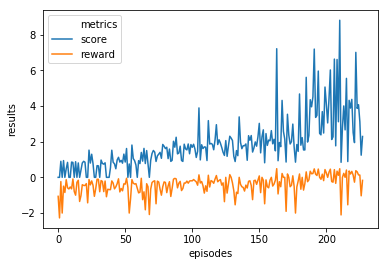

Max Train Score 17 Max Test Score 29
Mean Train Score 1.8532937073623508 Mean Test Score 4.42372001644845
----------------------------------------------------------------------------------------------------
entropy 0.003954755420700051


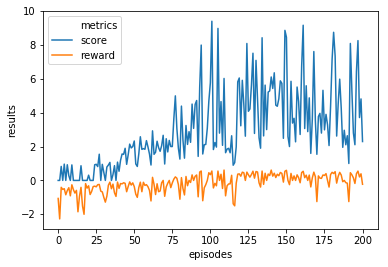

Max Train Score 18 Max Test Score 25
Mean Train Score 2.9760499647128245 Mean Test Score 5.627448352347233
----------------------------------------------------------------------------------------------------
entropy 0.05879238969768106


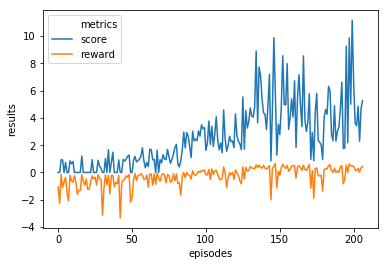

Max Train Score 21 Max Test Score 23
Mean Train Score 2.558028085485665 Mean Test Score 5.419041718624842
----------------------------------------------------------------------------------------------------


In [7]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    entropy = random.uniform(0, 0.1)
    
    model = A2C(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=0.97, ent_coef=entropy)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[entropy] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)
    
for entropy, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("entropy", entropy)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)